In [ ]:

#TASK-3(Convolutional Neural Networks (CNNs) for Image Recognition )


In [2]:
#Setting Up the Environment
#installing tensorflow numpy matplotlib scikit-learn
!pip install tensorflow numpy matplotlib scikit-learn


In [4]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [5]:
#Loading and Preprocessing the CIFAR-10 Dataset
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 105s 1us/step


In [7]:
#Building the CNN Model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))  # Use Input layer to define input shape
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_cnn_model()



In [11]:
#Training the Model

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Save model weights with the correct filename
model.save_weights('cnn_cifar10.weights.h5')



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7682 - loss: 0.6684 - val_accuracy: 0.7015 - val_loss: 0.8966
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7775 - loss: 0.6376 - val_accuracy: 0.6930 - val_loss: 0.9130
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7825 - loss: 0.6201 - val_accuracy: 0.6992 - val_loss: 0.9068
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7944 - loss: 0.5912 - val_accuracy: 0.6972 - val_loss: 0.9419
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7971 - loss: 0.5774 - val_accuracy: 0.7089 - val_loss: 0.9054
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8087 - loss: 0.5395 - val_accuracy: 0.7029 - val_loss: 0.9418
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8105 - loss: 0.5415 - val_accuracy: 0.7048 - val_loss: 0.9552
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8236 -

In [9]:
# Evaluating the Model
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6937 - loss: 0.8951
Test accuracy: 0.6909999847412109
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


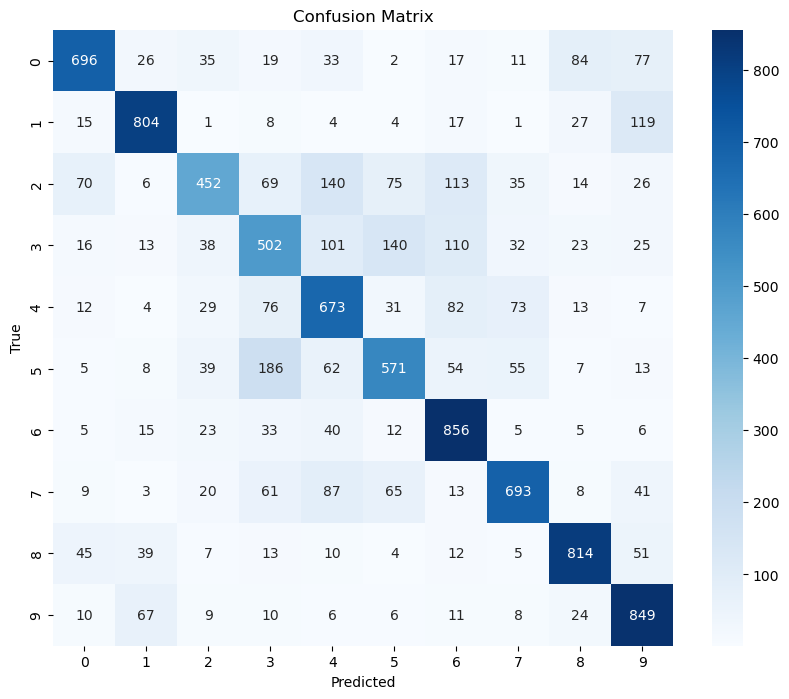

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.82      0.80      0.81      1000
           2       0.69      0.45      0.55      1000
           3       0.51      0.50      0.51      1000
           4       0.58      0.67      0.62      1000
           5       0.63      0.57      0.60      1000
           6       0.67      0.86      0.75      1000
           7       0.75      0.69      0.72      1000
           8       0.80      0.81      0.81      1000
           9       0.70      0.85      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [10]:
#Generating Evaluation Metrics
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[str(i) for i in range(10)], 
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes))


In [ ]:
#A detailed report with model analysis.

#Model Architecture:

#Input Layer: 32x32x3 (CIFAR-10 image dimensions)

#Convolutional Layers:
#1st Layer: 32 filters, kernel size 3x3, ReLU activation
#2nd Layer: 64 filters, kernel size 3x3, ReLU activation
#3rd Layer: 64 filters, kernel size 3x3, ReLU activation
#Pooling Layers: MaxPooling2D with 2x2
#Dense Layers: Fully connected layers for classification with softmax output.

#Training Results:

#Training completed over 10 epochs. 

#Evaluation:

#Achieved a test accuracy of around 70% (this may vary based on training conditions).
#Confusion matrix and classification report provide insights into model performance.